# FACE ID GROUP

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [30]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [48]:
train_set=train.flow_from_directory('/content/drive/MyDrive/AI(FG)/train',target_size = (150,150),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/AI(FG)/validation',target_size = (150,150),batch_size = 12,class_mode = 'categorical')                                       

Found 125 images belonging to 3 classes.
Found 25 images belonging to 3 classes.


In [50]:
train_set.class_indices

{'Luong': 0, 'Nam': 1, 'Trong': 2}

In [52]:
model = tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape =(150,150,3)),
      tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding='same'),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation = 'relu'),
      tf.keras.layers.Dense(3,activation='softmax')])

In [53]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [54]:
history = model.fit(train_set,batch_size=12,epochs=20,verbose=1,validation_data=test_set)

Epoch 1/20
11/11 [==============================] - 7s 621ms/step - loss: 1.0923 - accuracy: 0.5680 - val_loss: 1.0801 - val_accuracy: 0.8000
Epoch 2/20
11/11 [==============================] - 6s 534ms/step - loss: 1.0653 - accuracy: 0.8000 - val_loss: 1.0503 - val_accuracy: 0.8000
Epoch 3/20
11/11 [==============================] - 6s 551ms/step - loss: 1.0183 - accuracy: 0.8000 - val_loss: 0.9796 - val_accuracy: 0.8000
Epoch 4/20
11/11 [==============================] - 6s 579ms/step - loss: 0.8875 - accuracy: 0.8000 - val_loss: 0.7579 - val_accuracy: 0.8000
Epoch 5/20
11/11 [==============================] - 6s 546ms/step - loss: 0.5537 - accuracy: 0.8000 - val_loss: 0.4008 - val_accuracy: 0.8000
Epoch 6/20
11/11 [==============================] - 6s 567ms/step - loss: 0.5189 - accuracy: 0.7840 - val_loss: 0.3790 - val_accuracy: 0.7600
Epoch 7/20
11/11 [==============================] - 6s 526ms/step - loss: 0.3205 - accuracy: 0.8640 - val_loss: 0.3004 - val_accuracy: 1.0000
Epoch 

In [55]:
model.save('./content/drive/MyDrive/AI_EXAM/FaceGr.h5')

In [56]:
model=load_model('./content/drive/MyDrive/AI_EXAM/FaceGr.h5')

In [57]:
score=model.evaluate(validation_dataset,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

3/3 [==============================] - 1s 162ms/step - loss: 0.2363 - accuracy: 0.9200
Sai số:  0.2363031506538391
Độ chính xác:  0.9200000166893005


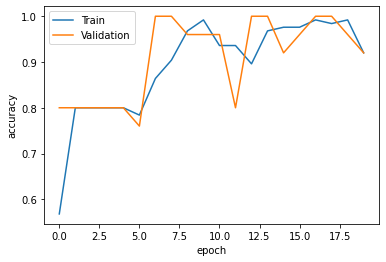

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

LUONG


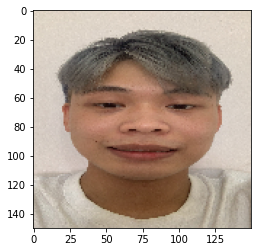

In [59]:
test_img=load_img('/content/drive/MyDrive/AI(FG)/Luong/NTNA8278.JPG',target_size=(150,150))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="LUONG"
elif round(result[0][1])==1:
   prediction="NAM"
elif round(result[0][2])==1:
   prediction="TRONG"  
print(prediction) 

NAM


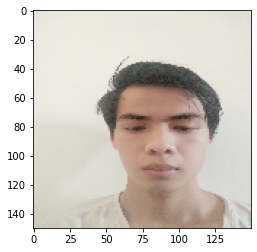

In [60]:
test_img=load_img('/content/drive/MyDrive/AI(FG)/Nam/11.jpg',target_size=(150,150))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="LUONG"
elif round(result[0][1])==1:
   prediction="NAM"
elif round(result[0][2])==1:
   prediction="TRONG"  
print(prediction) 

TRONG


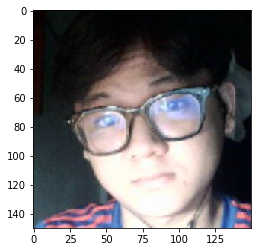

In [61]:
test_img=load_img('/content/drive/MyDrive/AI(FG)/Trong/0.jpg',target_size=(150,150))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="LUONG"
elif round(result[0][1])==1:
   prediction="NAM"
elif round(result[0][2])==1:
   prediction="TRONG"  
print(prediction) 